In [1]:
from csv import reader
from math import sqrt
import pandas

flag =False

# Load a CSV file
def load_csv(filename):
    dataset = list()
    with open(filename, 'r') as file:
        csv_reader = reader(file)
        for row in csv_reader:
            if not row:
                continue
            dataset.append(row)
    return dataset
 
# Convert string column to float
def str_column_to_float(dataset, column):
    for row in dataset:
        row[column] = float(row[column].strip())
 
# Convert string column to integer
# Call to this function only if the labels are non-numeric
def str_column_to_int(dataset, column):
    class_values = [row[column] for row in dataset]
    unique = set(class_values)
    lookup = dict()
    for i, value in enumerate(unique):
        lookup[value] = i
#         print('[%s] => %d' % (value, i))
    for row in dataset:
        row[column] = lookup[row[column]]
    return lookup
 
# Find the min and max values for each column
def dataset_minmax(dataset):
    minmax = list()
    for i in range(len(dataset[0])):
        col_values = [row[i] for row in dataset]
        value_min = min(col_values)
        value_max = max(col_values)
        minmax.append([value_min, value_max])
    return minmax
 
# Rescale dataset columns to the range 0-1
def normalize_dataset(dataset, minmax):
    for row in dataset:
        for i in range(len(row)):
            row[i] = (row[i] - minmax[i][0]) / (minmax[i][1] - minmax[i][0])
 


In [2]:
# Calculate the Euclidean distance between two vectors
def euclidean_distance(row1, row2):
    distance = 0.0
    for i in range(len(row1)-1):
        distance += (row1[i] - row2[i])**2
    return sqrt(distance)
 
# Locate the most similar neighbors
def get_neighbors(train, test_row, num_neighbors):
    distances = list()
    for train_row in train:
        dist = euclidean_distance(test_row, train_row)
        distances.append((train_row, dist))
    distances.sort(key=lambda tup: tup[1])
    neighbors = list()
    for i in range(num_neighbors):
        neighbors.append(distances[i][0])
    return neighbors
 
# Make a prediction with neighbors
def predict_classification(train, test_row, num_neighbors):
    neighbors = get_neighbors(train, test_row, num_neighbors)
    output_values = [row[-1] for row in neighbors]
    prediction = max(set(output_values), key=output_values.count)
    return prediction
 
# Make a prediction with KNN on the dataset
filename = 'wmd.csv'
# Skipping the first row as the header row for the datasets
dataset = load_csv(filename)[1:]
for i in range(len(dataset[0])-1):
    str_column_to_float(dataset, i)
    
# convert class column to integers if the label is non-numeric
# lookup_dict = str_column_to_int(dataset, len(dataset[0])-1)
# print(lookup_dict)
# reverse_dict = {v: k for k, v in lookup_dict.items()}
# print(reverse_dict)

# define model parameter i.e. value of K in KNN
num_neighbors = 5
# define a new record
row = [2,4]
# predict the label
label = predict_classification(dataset, row, num_neighbors)
print('Data=%s, Predicted: %s' % (row, label))

Data=[2, 4], Predicted: 3.5


In [3]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix



In [4]:
actual_list= list()
predicted_list = list()
for i in dataset:
    actual_list.append(i[-1])

#     Actual prediction part (Takes a lot of time)
for j in dataset:
    predicted_list.append(predict_classification(dataset, j[:-1], num_neighbors))

In [5]:
print(actual_list[500:508])
print(predicted_list[500:508])

['4', '3.5', '4', '4.5', '4', '2.5', '3', '2.5']
['4', '4', '4', '4', '4', '4', '4', '4']


In [6]:
single = multilabel_confusion_matrix(actual_list, predicted_list)
print(single)

[[[16333   120]
  [  440    36]]

 [[16258   205]
  [  412    54]]

 [[16605     0]
  [  324     0]]

 [[15166   839]
  [  812   112]]

 [[16098    93]
  [  721    17]]

 [[12747  1282]
  [ 2409   491]]

 [[13162  1772]
  [ 1594   401]]

 [[ 7692  4550]
  [ 2637  2050]]

 [[13322  1728]
  [ 1327   552]]

 [[12631  1758]
  [ 1671   869]]]


In [7]:
results = confusion_matrix(actual_list, predicted_list)
print(results)


[[  36   29    0   21    0   41   49  251   23   26]
 [  11   54    0   47    1   76   89   93   30   65]
 [   4    1    0   45    1   56   85   86   22   24]
 [   9   24    0  112    9  138  152  271   70  139]
 [   7    0    0  102   17  103  128  265   80   36]
 [  13   40    0  230   16  491  285 1105  199  521]
 [  12    3    0  115   20  220  401  791  301  132]
 [  33   43    0  156   17  361  574 2050  751  702]
 [   8    0    0   54   19  102  241  790  552  113]
 [  23   65    0   69   10  185  169  898  252  869]]


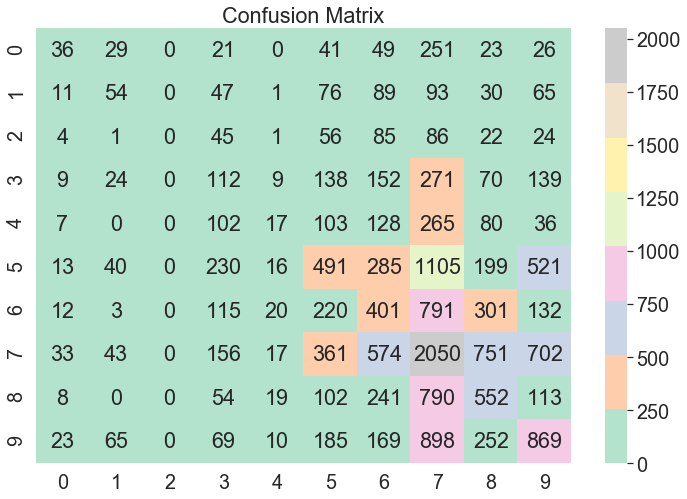

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale =1.8)
plt.figure(figsize = [12,8])
plt.title("Confusion Matrix")
sns.heatmap(results,annot=True,fmt = 'd',cbar=True, cmap ="Pastel2")
# plt.savefig('confusion.png')

In [9]:
import pandas as pd
from sklearn.metrics import classification_report
average_scores = classification_report(actual_list, predicted_list)
print (average_scores)


              precision    recall  f1-score   support

         0.5       0.23      0.08      0.11       476
           1       0.21      0.12      0.15       466
         1.5       0.00      0.00      0.00       324
           2       0.12      0.12      0.12       924
         2.5       0.15      0.02      0.04       738
           3       0.28      0.17      0.21      2900
         3.5       0.18      0.20      0.19      1995
           4       0.31      0.44      0.36      4687
         4.5       0.24      0.29      0.27      1879
           5       0.33      0.34      0.34      2540

    accuracy                           0.27     16929
   macro avg       0.21      0.18      0.18     16929
weighted avg       0.26      0.27      0.25     16929



D:\Anaconda3\envs\jobwebrec\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [11]:
average_scores = classification_report(actual_list, predicted_list, output_dict=True)
df = pd.DataFrame(average_scores).transpose()
df.to_csv("classification_report_wmd.csv")